<a href="https://colab.research.google.com/github/mopahlevani/Numerical-Methods/blob/main/1.%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Student 1 Name: Mehmet Emre Durmus
- Student 2 Name: Francesco Merlo
- Student 3 Name: Mohammad Hadi Pahlevani

change the name of this notebook to  `name_1_name_2_notebook_??.ipynb` with *no spaces, no accents and no strange characters!* and where `??` stands for the number of the notebook you are working on.

# M1 PPM -- Numerical Methods for Physics

# Numerical methods: basics and linear regression

# Numbers, approximations and errors

Import the needed packages

In [ ]:
import numpy as np #for array arithmetic
# Importing necessary libraries or modules.
import matplotlib.pyplot as plt #for plots
# Importing necessary libraries or modules.
import pandas as pd #for data analysis
# Importing necessary libraries or modules.
import scipy as sc #for constants
# Importing necessary libraries or modules.

### Write a program that determines the underflow and overflow limits

Overflow

In [ ]:
n = 2.0
# Variable assignment: n gets its value.
s = 0
# Variable assignment: s gets its value.

while n != float('inf'): #while-loop to perform multiplications until the number becomes inf
    n *= 2
# Variable assignment: n * gets its value.
    s += 1
# Variable assignment: s + gets its value.

print(f'{n} reached after {s} multiplications by 2')

inf reached after 1023 multiplications by 2


Underflow

In [ ]:
n = 2.0
# Variable assignment: n gets its value.
s = 0
# Variable assignment: s gets its value.

while n != 0: #while-loop to perform divisions until the number becomes 0
    n /= 3
# Variable assignment: n / gets its value.
    s += 1
# Variable assignment: s + gets its value.

print(f'{n} reached after {s} divisions by 3')

0.0 reached after 679 divisions by 3


### Write a program to determine the machine precision (within a factor of two)

In [ ]:
s=1
# Variable assignment: s gets its value.

while 1+s != 1: #while-loop to decrease the positive number added to one until the result is one
    s/=2
# Variable assignment: s/ gets its value.

print(s)

1.1102230246251565e-16


### Explore subtractive cancellation

Consider the functions:
$f(x)=\frac{1-\sqrt{1-t(x)^2}}{t(x)}$  where $t(x)=e^{-\pi x}$

- plot the function $f(x)$ for $x$ in the range $[5,7]$

Rewrite the function $f(x)$ as

$$ \frac{t(x)}{1+\sqrt{1-t(x)^2}} $$

- plot on the same graph the two functions and comment

- label the axes

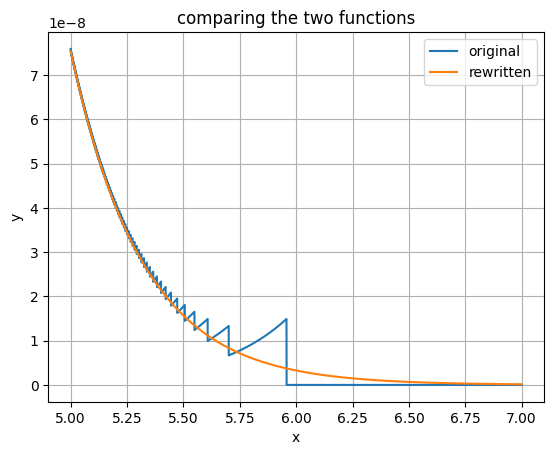

In [ ]:
x = np.linspace(5, 7, 10000) #creating the array for the x-axis
# Variable assignment: x gets its value.
t = np.exp(-np.pi*x) # defining t(x)
# Variable assignment: t gets its value.
y1 = (1-np.sqrt(1-t**2))/t #defining the first (original) function
# Variable assignment: y1 gets its value.
y2 = t/(1+np.sqrt(1-t**2)) #defining the second (rewritten) function
# Variable assignment: y2 gets its value.

plt.plot(x, y1,label='original') #adding the functions to the plot
# Variable assignment: plt.plot(x, y1,label gets its value.
plt.plot(x, y2,label='rewritten')
# Variable assignment: plt.plot(x, y2,label gets its value.
plt.xlabel('x') #labels
plt.ylabel('y')
plt.legend(loc="upper right") #to add a legend to the plot
# Variable assignment: plt.legend(loc gets its value.
plt.grid() #to add a grid to the plot
plt.title('comparing the two functions') #adding a title
plt.show()

# Linear regression

### Linear regression on simple data sets

- Write a function that given the input data returns the fitting parameters $a_1$ and $a_2$. The function template is:

```python
def lin_reg(x_data, y_data):
    """Function documentation"""
    

    return (a0, a1)
```

- Test your function on a simple set of data: plot the data and the fitted function

In [ ]:
def lin_reg(x_data, y_data):
# Function definition: Describe the purpose and parameters of the function.

    mx = x_data.mean() #average x
# Variable assignment: mx gets its value.
    my = y_data.mean() #average y
# Variable assignment: my gets its value.
    s1 = x_data.count()*x_data.cov(y_data,ddof=0) #n*cov(x,y)
# Variable assignment: s1 gets its value.
    s2 = x_data.count()*x_data.var(ddof=0) #n*var(x)
# Variable assignment: s2 gets its value.

    a1 = s1/s2 #first degree coefficient for the linear fit (slope)
# Variable assignment: a1 gets its value.
    a0 = y_data.mean()-a1*x_data.mean() #zeroth degree coefficient for the linear fit (intercept)
# Variable assignment: a0 gets its value.
    return(a0,a1)

### Linear regression on solar wind data

We are now going to perform a linear regression fitting on measurements of the solar wind from the spacecraft [ULYSSE](https://en.wikipedia.org/wiki/Ulysses_(spacecraft)).

- The solar wind data is in the file `ulysse.txt` in the `data/` folder. The data file contains three columns
    1. First column: the heliocentric distance in AU (astronomical units), $r$
    2. Second column: the solar wind density in m$^{-3}$, $n(r)$
    3. Third column: the temperature in Kelvin, $T(r)$
    
- load and plot the data (always label your plots and put the units!!)

In [ ]:
df = pd.read_csv('data/ulysse.txt', sep=" ", header=None) #reading the data file and creating a data frame for it
# Variable assignment: df gets its value.
df.columns = ["r", "n", "t"] #naming the columns
# Variable assignment: df.columns gets its value.
df.r = df.r.apply(lambda x: x*1.496e11)
# Variable assignment: df.r gets its value.
df #show the data frame

Mounted at /content/drive


,r,n,t
0,3.432871e+11,0.50914,154832.0
1,3.432422e+11,0.49680,162657.0
2,3.431974e+11,0.51041,166343.0
3,3.431525e+11,0.44905,174074.0
4,3.431076e+11,0.44551,178535.0
...,...,...,...
4821,3.019078e+11,0.59206,205223.0
4822,3.019526e+11,0.62258,196549.0
4823,3.019975e+11,0.63182,191816.0
4824,3.020424e+11,0.62309,179832.0


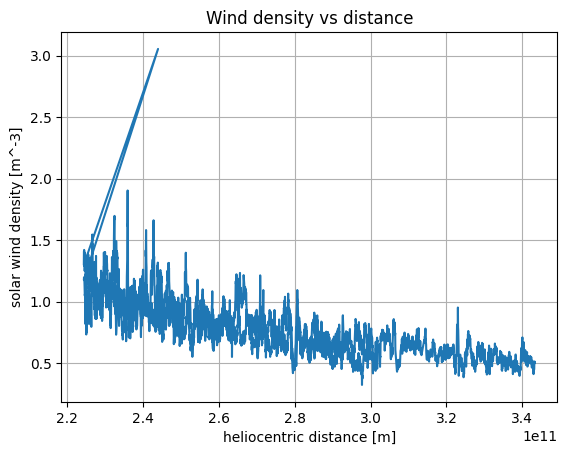

In [ ]:
plt.plot(df.r,df.n) #determining data for the plot
plt.xlabel('heliocentric distance [m]') #naming the axes
plt.ylabel('solar wind density [m^-3]')
plt.grid() #adding a grid for visibility
plt.title('Wind density vs distance') #adding a title
plt.show()

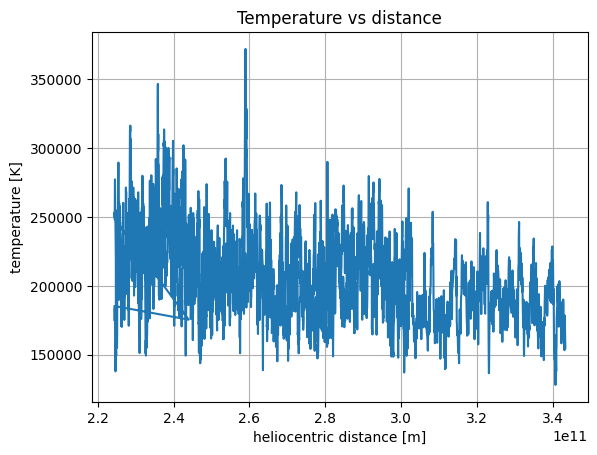

In [ ]:
plt.plot(df.r,df.t) #determining data for the plot
plt.xlabel('heliocentric distance [m]') #naming the axes
plt.ylabel('temperature [K]')
plt.grid() #adding a grid for visibility
plt.title('Temperature vs distance') #adding a title
plt.show()

The solar wind is "well" approximated as steady-state, spherically symmetric expanding plasma sphere. The expected density as a function of heliocentric distance is: $$n(r) = \alpha r^{-2}$$
 - From conservation of mass and momentum, can you show why it is so?
 - Fit the satellite data...be careful, you want to do a linear regression on a power law data.
 - Plot the data and your fit.
     - Would you conclude that the solar wind density distribution is as "expected"?

We have for the mass flux:

$$\delta_t M=n v A$$

where $n$ is the density, $v$ is the velocity of the solar wind, and $A$ is the surface area of a sphere with radius r. From this equation, by the conservation of mass, we get for two distances $r_1$ and $r_2$:

$$n_1v_1A_1=n_2v_2A_2$$

Now since the the flow is in a steady-state we get that the velocities are the same. Moreover, we have that the surface area is $4\pi r^2$, which gives:

$$n_1 r_1^2=n_2 r_2^2\implies n_2=n_1\left(\frac{r_1}{r}\right)^2=\alpha r^{-2}$$

which is the desited result.

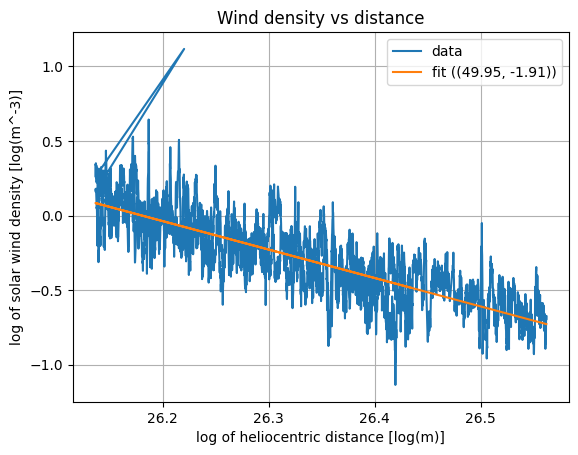

In [ ]:
a0,a1 = lin_reg(np.log(df.r),np.log(df.n)) #determining the linear regression coefficiants for the plot
# Variable assignment: a0,a1 gets its value.

plt.plot(np.log(df.r),np.log(df.n),label='data') #determining and taking the log of the data for the plot
# Variable assignment: plt.plot(np.log(df.r),np.log(df.n),label gets its value.
plt.plot(np.log(df.r),a0+a1*np.log(df.r),label=f'fit ({round(a0,2),round(a1,2)})') #adding the linear regression with the calculated coefficients
# Variable assignment: plt.plot(np.log(df.r),a0+a1*np.log(df.r),label gets its value.
plt.xlabel('log of heliocentric distance [log(m)]') #naming the axes
plt.ylabel('log of solar wind density [log(m^-3)]')
plt.grid() #adding a grid for visibility
plt.legend(loc='upper right') #adding a legend
# Variable assignment: plt.legend(loc gets its value.
plt.title('Wind density vs distance') #adding a title
plt.show()

The linear fit agrees well with the data in general. Indeed, the mean absolute difference between the data and the fit is just 0.12 (see below); hence, the distribution is as expected. Moreover, given the uncertainty within the values of the experiment it could be more apparent (with error bars on the plot) that the fit is appropriate.

In [ ]:
round(((np.log(df.n)-(a0+a1*np.log(df.r))).abs()).mean(),2) #mean absolute difference between the data and the liner fit

0.12

Assuming the solar wind to behave as a perfect gas ($\gamma = 5/3$), the pressure is then given by: $$P(r) = k_{B} n(r) T(r)$$

 - By fitting the pressure data as function of distance, show that the solar wind expansion is neither adiabatic nor isothermal

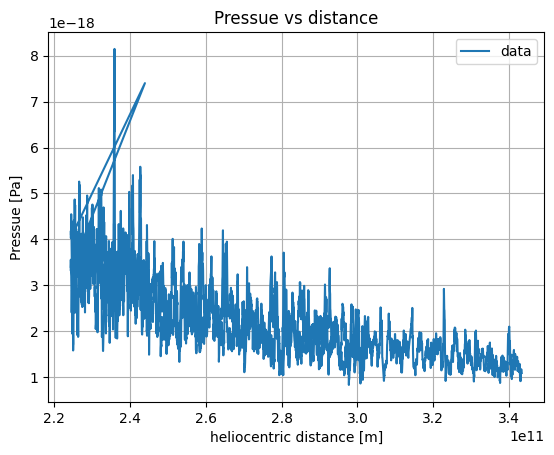

In [ ]:
P = sc.constants.k*df.n*df.t #determine the theoretical Pressure with respect to the distance
# Variable assignment: P gets its value.
gam = 5/3 #the gamma of the perfect gas
# Variable assignment: gam gets its value.
plt.plot(df.r,P,label='data') #plot for the data
# Variable assignment: plt.plot(df.r,P,label gets its value.
plt.xlabel('heliocentric distance [m]') #adding the labels
plt.ylabel('Pressue [Pa]')
plt.legend(loc='upper right') #adding a legend
# Variable assignment: plt.legend(loc gets its value.
plt.title('Pressue vs distance') #adding a title
plt.grid() #adding a title

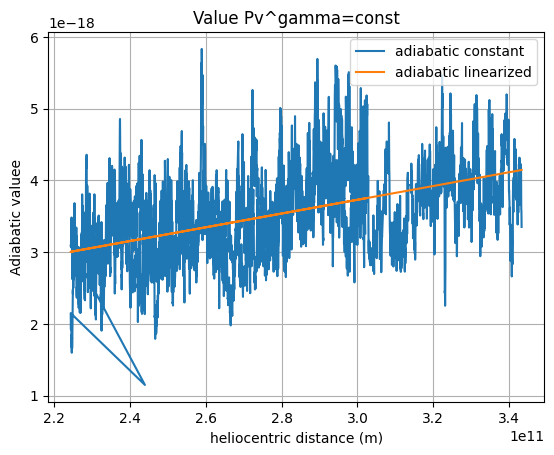

In [ ]:
ad = P*(df.n)**(-gam) #caluclating the adiabatic value for each point
# Variable assignment: ad gets its value.
b1,m1 = lin_reg(df.r,ad) #determining the linear regression coefficiants for the plot
# Variable assignment: b1,m1 gets its value.

plt.plot(df.r,ad, label ='adiabatic constant') #adiabatic value obtiained in each point by the equation P*(v^-gamma) = const
# Variable assignment: plt.plot(df.r,ad, label gets its value.
plt.plot(df.r,b1+m1*df.r,label = 'adiabatic linearized') #adding the linear regression with the calculated coefficients
# Variable assignment: plt.plot(df.r,b1+m1*df.r,label gets its value.

plt.xlabel('heliocentric distance (m)')
plt.ylabel('Adiabatic valuee')
plt.legend(loc='upper right')
# Variable assignment: plt.legend(loc gets its value.
plt.title('Value Pv^gamma=const')
# Variable assignment: plt.title('Value Pv^gamma gets its value.
plt.grid()

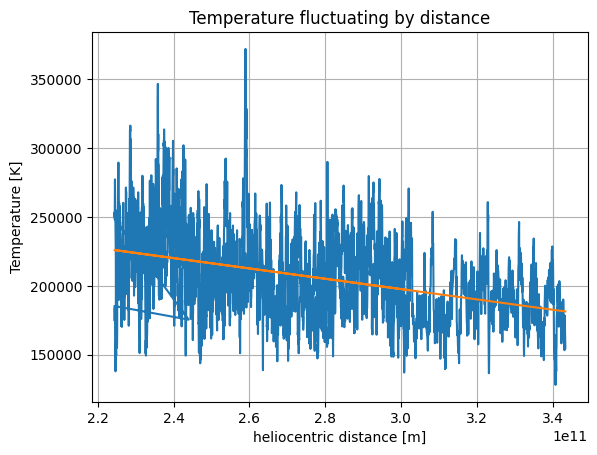

In [ ]:
b2,m2 = lin_reg(df.r,df.t)
# Variable assignment: b2,m2 gets its value.
plt.plot(df.r,df.t, label = 'punctual temeprature depending from distance')
# Variable assignment: plt.plot(df.r,df.t, label gets its value.
plt.plot(df.r,b2+m2*df.r,label = 'average temperature behaviour in the process')
# Variable assignment: plt.plot(df.r,b2+m2*df.r,label gets its value.
plt.title('Temperature fluctuating by distance')
plt.xlabel('heliocentric distance [m]')
plt.ylabel('Temperature [K]')
plt.grid()
plt.show()

As it is shown in both the two previous graphs, neither the local fluctiation of the values, neither the global trend obtained by linearization of the whole datas of the acquired by the satellite, seems to show something close to a constant value.
This means that the transofmration is not linear or adiabaticc if we see the phyisical phenomena in both local or global scales.
In fact, the temperature decreases ad the satellite goes away from the sun (reasonable) and the adiabatic ocnstant increases, meaning more entropy as how it should naturally occour.